<a href="https://colab.research.google.com/github/sonnnaya/DecisiveAndDividingFunctions/blob/main/DecisiveAndDividingFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification by using decisive functions and diving hypersurfaces
### Introduction
---
Let the input set of images represented by $n$-dimensional vectors be given:
$$
X=\{\overline{x}_{1}, \overline{x}_{2},...,\overline{x}_{N}\},
$$
where $\overline{x}_{i}=[x_{1},x_{2},...,x_{n}]^{T}$

And the classes $\omega_{1},\omega_{2},...,\omega_{m}$ described by the relevant standards:
$$\overline{z}_{1},\overline{z}_{2},...,\overline{z}_{m}$$

Read the topic [Classification by minimum distance](https://github.com/sonnnaya/MinimumDistanceClassification/blob/master/MinimumDistanceClassification.ipynb) for mor info.

---

The problem of classification can be considered as construction of the borders that divide the set of $M$ classes of images, based on an training set of these images-vectors.

These boundaries are called *divinging hypersurfaces* (or functions). They can be defined by decisive functions. These functions are also called *discriminant* and are scalar and unambiguous functions of the image $\overline{x}$.


## Desicive function
Desicive function is a function of the image (vector) argument, which determines the belonging of the incoming image to a certain class. So, the decisive function is related to the class.

### Definition
The general form of the linear decisive function is defined by the following expression:
$$
d_{i}(\overline{x})=w_{i1}x_{1}+w_{i2}x_{2}+...+w_{in}x_{n},
$$
where:

$\overline{x}=[x_{1},x_{2},...,x_{n}]^{T}$

$\overline{w_{i}}=[w_{i1},w_{i2},...,w_{in}]^{T}$ - weights

### Finding a function by the minimum distance similarity measure
According to the topic [Classification by minimum distance](https://github.com/sonnnaya/MinimumDistanceClassification/blob/master/MinimumDistanceClassification.ipynb) this similarity measure is described by the equation:
$$
D_{i}=|\overline{x}-\overline{z}_{i}|=\sqrt{(\overline{x}-\overline{z}_{i})^{T}*(\overline{x}-\overline{z}_{i})}=\sqrt{(\overline{x}-\overline{z}_{i})^{T}*(\overline{x}-\overline{z}_{i})}=\sqrt{\sum_{j=1}^{n} (x_{j}-z_{ij})}
$$
Let's square both sides of the equation:
$$
D_{i}^{2}=|\overline{x}-\overline{z}_{i}|^{2}=(\overline{x}-\overline{z}_{i})^{T}*(\overline{x}-\overline{z}_{i})=\overline{x}^{T}\overline{x}-2\overline{x}^{T}\overline{z}_{i}+\overline{z}_{i}^{T}\overline{z}_{i}=\\
=\overline{x}^{T}\overline{x}-2(\overline{x}^{T}\overline{z}_{i}+\frac{1}{2}\overline{z}_{i}^{T}\overline{z}_{i})
$$
So, we will get a minimum of squared distance $D_{i}^{2}$ by maximizing second part of the equation
$
(\overline{x}^{T}\overline{z}_{i}+\frac{1}{2}\overline{z}_{i}^{T}\overline{z}_{i})
$,
because $\overline{x}^{T}\overline{x}$ doesn't depend on $i$ value.

Thus, we can define linear desicive function as:
$$
d_{i}(\overline{x})=\overline{x}^{T}\overline{z}_{i}+\frac{1}{2}\overline{z}_{i}^{T}\overline{z}_{i}
$$

In [ ]:
from typing import List, Any
import numpy as np


class Cluster:
    def __init__(self, standards: List[list]):
        self.standards: List[np.ndarray] = [np.array(each) for each in standards]
        self.images: List[np.ndarray] = []

    def get_distance(self, image: list) -> float:
        to_all_standards = [np.linalg.norm(np.array(image) - each) for each in self.standards]
        return min(to_all_standards)

    def add_image(self, image: list) -> None:
        self.images.append(np.array(image))

    def decisive_function(self, image: list) -> Any:
        standard = np.mean(self.standards, axis=0)
        return np.sum((np.sum(np.array(image).transpose() * standard) - 0.5 * np.sum(standard.transpose() * standard)))


### Using decisive function for classification
The classification rule by using decisive function can be simply described in this way:

Image $\overline{x}$ belongs to class $\omega_{i}$ if:
$$
d_{i}(\overline{x})=max(d_{1}(\overline{x}),d_{2}(\overline{x}),...d_{j}(\overline{x})...,d_{M}(\overline{x})),\ \forall i \neq j ,\ \  j=\overline{1,M}$$ 

In [ ]:
def get_clustered_decisive(image_list: List[list], clusters: List[Cluster]) -> List[Cluster]:
    classificated = clusters[:]

    for image in image_list:
        values = [cluster.decisive_function(image) for cluster in classificated]
        maximum = max(values)
        index = values.index(maximum)
        classificated[index].add_image(image)

    return classificated

## Dividing function
### Definition
The boundary between classes $\omega_{𝑖}$ and $\omega_{𝑗}$ is determined by those values of $\overline{x}$ at which the equality $𝑑_{𝑖}(\overline{x}) = 𝑑_{𝑗} (\overline{x})$ takes place (or $𝑑_{𝑖}(\overline{x}) - 𝑑_{𝑗} (\overline{x})=0$). So, the dividing function can be simply described by this formula:
$$d_{ij}(\overline{x})=𝑑_{𝑖}(\overline{x}) - 𝑑_{𝑗} (\overline{x})\ \forall i \neq j$$

It is also true that:
$$d_{ij}(\overline{x})=-d_{ji}(\overline{x})$$

Therefore, this function describes the equation of a straight line for 2-dimensional space, or the equation of a plane for 3-dimensional space. 
So, in general, it describes a hyperspace equation that separates grouped sets of n-dimensional vectors (classes) in n-dimensional space respectively.

Note that these functions are defined for each pair of classes, so for $M$ classes it is necessary to find $\frac{M(M-1)}{2}$ dividing functions.



---




> *Note that this approach only works for linearly separated classes. Otherwise, the image classification may lead a non-decision area.*




---



In [ ]:
from typing import Callable


class DividingFunction:
    def __init__(self, cluster1: Cluster, cluster2: Cluster):
        self.cluster1 = cluster1
        self.cluster2 = cluster2
        self.function: Callable[[list], float] = DividingFunction.get_function(cluster1, cluster2)

    def __call__(self, image: list) -> float:
        return self.function(image)

    @staticmethod
    def get_function(cluster1: Cluster, cluster2: Cluster) -> Callable[[list], float]:
        def dividing(image: list) -> float:
            return cluster1.decisive_function(image) - cluster2.decisive_function(image)

        return dividing


### Using dividing function for classification
The classification rule by using dividing function can be simply described in this way:

Image $\overline{x}$ belongs to class $\omega_{i}$ if:
$$
d_{ij}(\overline{x})=max(d_{12}(\overline{x}),d_{13}(\overline{x}),...d_{ij}(\overline{x})...,d_{MM-1}(\overline{x})),\ \forall i \neq j ,\ \  i,j=\overline{1,M}$$ 

In [ ]:
def get_clustered_dividing(images: List[list], clusters: List[Cluster]) -> List[Cluster]:
    classificated = clusters[:]
    length = len(classificated)
    dividings = [DividingFunction(classificated[i], classificated[j])
                 for i in range(length)
                 for j in range(length)
                 if i != j]

    for image in images:
        dividing_values = list(map(lambda dividing: dividing(image), dividings))
        maximum = max(dividing_values)
        index = dividing_values.index(maximum)

        dividings[index].cluster1.add_image(image)

    return classificated

# Testing

In [ ]:
from google.colab import files 

  
uploaded = files.upload()

Saving data_test.csv to data_test.csv


## Classification by decisive function

In [ ]:
from numpy import genfromtxt

images = genfromtxt('data_test.csv', delimiter=',')
clusters = [Cluster([[0.52, 5.7]]), Cluster([[-7.72, 1.06]]),
            Cluster([[5.3, -2.61]]), Cluster([[-1.81, -6.34]])]

classificated = get_clustered_decisive(images, clusters)

for i, each in enumerate(classificated):
    print(f"Class {str(i + 1)}:")
    for image in each.images:
        print(list(image), end=', ')
    print()


Class 1:
[0.52, 5.7], [1.68, 5.97], [1.5, 8.2], [-1.19, 7.64], [1.59, 3.7], [-0.58, 4.73], [0.56, 9.33], 
Class 2:
[-7.72, 1.06], [-7.03, 0.36], [-6.69, 2.33], [-8.26, -1.7], [-8.12, -3.31], [-5.79, -2.7], [-4.7, 0.09], 
Class 3:
[5.3, -2.61], [3.71, -2.46], [6.38, 1.0], [3.63, 0.82], [6.44, -2.58], [5.66, 0.73], 
Class 4:
[-1.81, -6.34], [0.72, -7.0], [0.78, -4.55], [-0.83, -4.4], [-0.49, -7.97], [-1.72, -8.46], [-1.45, -3.73], [1.54, -5.91], 


## Visualization of classification results

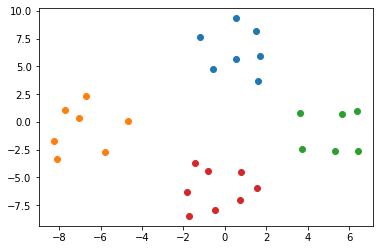

In [ ]:
import matplotlib.pyplot as plt


image_clusters = [cluster.images for cluster in classificated]

x_es = [[image[0] for image in images] for images in image_clusters]
y_es = [[image[1] for image in images] for images in image_clusters]

for i in range(len(x_es)):
    plt.scatter(x_es[i], y_es[i])
  
plt.show()


## Classification by dividing function

In [ ]:
clusters = [Cluster([[0.52, 5.7]]), Cluster([[-7.72, 1.06]]),
            Cluster([[5.3, -2.61]]), Cluster([[-1.81, -6.34]])]

classificated = get_clustered_dividing(images, clusters)

for i, each in enumerate(classificated):
    print(f"Class {str(i + 1)}:")
    for image in each.images:
        print(list(image), end=', ')
    print()


Class 1:
[0.52, 5.7], [1.68, 5.97], [1.5, 8.2], [-1.19, 7.64], [1.59, 3.7], [-0.58, 4.73], [0.56, 9.33], 
Class 2:
[-7.72, 1.06], [-7.03, 0.36], [-6.69, 2.33], [-8.26, -1.7], [-8.12, -3.31], [-5.79, -2.7], [-4.7, 0.09], 
Class 3:
[5.3, -2.61], [3.71, -2.46], [6.38, 1.0], [3.63, 0.82], [6.44, -2.58], [5.66, 0.73], 
Class 4:
[-1.81, -6.34], [0.72, -7.0], [0.78, -4.55], [-0.83, -4.4], [-0.49, -7.97], [-1.72, -8.46], [-1.45, -3.73], [1.54, -5.91], 


## Visualization of classification results
As it was discussed above, dividing function are the hyperspaces separating each pair of classes. For 2-dimensional images divinings functions describe a line equation.

Let's express $x_{2}$ in terms of $x_{1}$ from the dividing function equation:
$$
d_{ij}(\overline{x})=𝑑_{i}(\overline{x}) - 𝑑_{j}(\overline{x})\\
\overline{x}^{T}\overline{z}_{i}+\frac{1}{2}\overline{z}_{i}^{T}\overline{z}_{i}-\overline{x}^{T}\overline{z}_{j}+\frac{1}{2}\overline{z}_{j}^{T}\overline{z}_{j}\\
x_{1}z_{i1}+x_{2}z_{i2}-\frac{1}{2}\overline{z}_{i}^{T}\overline{z}_{i}-x_{1}z_{j1}-x_{2}z_{j2}+\frac{1}{2}\overline{z}_{j}^{T}\overline{z}_{j}\\
x_{2}(z_{i2}-z_{j2})=\frac{1}{2}(\overline{z}_{i}^{T}\overline{z}_{i}-\overline{z}_{j}^{T}\overline{z}_{j})+x_{1}(z_{j1}-z_{i1})\\
$$
So, finally we got:
$$
x_{2}=\frac{\frac{1}{2}(\overline{z}_{i}^{T}\overline{z}_{i}-\overline{z}_{j}^{T}\overline{z}_{j})+x_{1}(z_{j1}-z_{i1})}{z_{i2}-z_{j2}}
$$
By using this equation we can draw boundaries between formed classes.

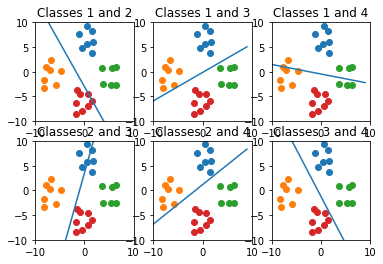

In [ ]:
def separator(x: float, cluster1: Cluster, cluster2: Cluster) -> float:
    s1 = np.mean(cluster1.standards, axis=0)
    s2 = np.mean(cluster2.standards, axis=0)

    return (0.5 * (np.dot(s1.T, s1) - np.dot(s2.T, s2)) + x * (s2[0] - s1[0])) / (s1[1] - s2[[1]])


image_clusters = [cluster.images for cluster in classificated]

x_es = [[image[0] for image in images] for images in image_clusters]
y_es = [[image[1] for image in images] for images in image_clusters]

x_separators = [x for x in np.arange(-10, 10, 1)]
y_separators = [[separator(x, classificated[i], classificated[j]) for x in np.arange(-10, 10, 1)]
                for i in range(len(classificated))
                for j in range(len(classificated))
                if j > i]

fig, axes = plt.subplots(nrows=2, ncols=3)

axes[0, 0].set(title='Classes 1 and 2')
axes[0, 1].set(title='Classes 1 and 3')
axes[0, 2].set(title='Classes 1 and 4')
axes[1, 0].set(title='Classes 2 and 3')
axes[1, 1].set(title='Classes 2 and 4')
axes[1, 2].set(title='Classes 3 and 4')

for i, ax in enumerate(axes.flat):
    for j in range(len(x_es)):
        ax.scatter(x_es[j], y_es[j])

    ax.plot(x_separators, y_separators[i])
    ax.axis([-10, 10, -10, 10])


plt.show()

Another view of all dividing lines in one plot:

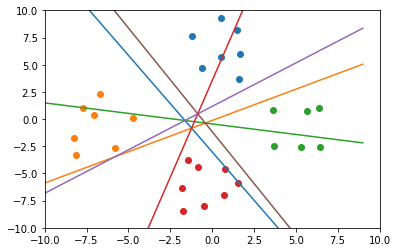

In [ ]:
for i in range(len(x_es)):
    plt.scatter(x_es[i], y_es[i])

for y in y_separators:
    plt.plot(x_separators, y)

plt.axis([-10, 10, -10, 10])
plt.show()